In [349]:
import pandas as pd
df2016 = pd.read_csv('features_with_labels_2016.csv')
df2016.head()
df2017 = pd.read_csv('features_with_labels_2017.csv')
df2017.head()

,Icao24,cls,start,end,start_lon,end_lon,start_lat,end_lat,max_alt,distance,time,avg_speed,Callsign_t,type
0,343148,5,1.507549e+09,1.507628e+09,-3.5563,-3.5546,40.4654,40.4638,38000.0,0.229026,78990.607,0.000003,AEA,0.0
1,343148,20,1.507805e+09,1.507808e+09,2.0350,-3.5323,41.2159,40.4698,29025.0,476.055441,3281.117,0.145089,AEA,0.0
2,3949e7,0,1.507425e+09,1.507450e+09,-77.4828,2.8108,38.9415,49.0061,39000.0,6224.442490,24614.460,0.252877,AFR,0.0
3,3c4897,0,1.507439e+09,1.507458e+09,6.7634,6.8034,51.2851,51.3041,37075.0,3.496624,18409.840,0.000190,BER,0.0
4,3c4897,275,1.507535e+09,1.507561e+09,6.7853,6.8015,51.3011,51.3032,37050.0,1.151474,26279.658,0.000044,BER,0.0


In [350]:
#count type=1
n = df2017.groupby('type').count().iloc[1,0]
print(n)
n2 = df2016.groupby('type').count().iloc[1,0]
print(n2)
n3 = df2017.groupby('type').count().iloc[0,0]
print(n3)
n4 = df2016.groupby('type').count().iloc[0,0]
print(n4)
r = round(n3/n)
r2 = round(n4/n2)
print(r)

248
116
4389
2384
18


In [385]:
from astral import LocationInfo
from astral.sun import sun
import datetime
import numpy as np

def gettimearea(timestamp, longtitude, latitude):
#     print(timestamp.shape)
    time_string = datetime.datetime.fromtimestamp(timestamp)
    year = time_string.year
    month = time_string.month
    day = time_string.day
    timearea = 0
    try:
        city = LocationInfo("", "", "UTC", latitude, longtitude)
        s = sun(city.observer, date=datetime.date(year, month, day))
        sunrise = s["sunrise"].replace(tzinfo=None)
        sunset = s["sunset"].replace(tzinfo=None)
    #         print((
    #             f'Dawn:    {s["dawn"]}\n'
    #             f'Sunrise: {s["sunrise"]}\n'
    #             f'Noon:    {s["noon"]}\n'
    #             f'Sunset:  {s["sunset"]}\n'
    #             f'Dusk:    {s["dusk"]}\n'
    #         ))
        #     midnight = datetime.datetime(year, month, day+1, 0, 0, 0)
            
        if sunrise < time_string <= sunset:
            timearea = 1
        else:
            timearea = 0
    except:
        timearea = None
    return timearea

def gettimedifference(timestamp, longtitude, latitude, n):
#     print(timestamp.shape)
    time_string = datetime.datetime.fromtimestamp(timestamp)
    year = time_string.year
    month = time_string.month
    day = time_string.day
    timedifference = 0
    try:
        city = LocationInfo("", "", "UTC", latitude, longtitude)
        s = sun(city.observer, date=datetime.date(year, month, day))
        sunrise = s["sunrise"].replace(tzinfo=None)
        sunset = s["sunset"].replace(tzinfo=None)
    #         print((
    #             f'Dawn:    {s["dawn"]}\n'
    #             f'Sunrise: {s["sunrise"]}\n'
    #             f'Noon:    {s["noon"]}\n'
    #             f'Sunset:  {s["sunset"]}\n'
    #             f'Dusk:    {s["dusk"]}\n'
    #         ))
        if n == 0:
            timedifference = time_string - sunrise
        else:
            timedifference = time_string - sunset
    except:
        timedifference = None
    return timedifference

In [386]:
df2017['startarea'] = df2017.apply(lambda row: gettimearea(row['start'], row['start_lon'], row['start_lat']), axis=1)
df2017['endarea'] = df2017.apply(lambda row: gettimearea(row['end'], row['end_lon'], row['end_lat']), axis=1)
df2017['start_sunrise'] = df2017.apply(lambda row: gettimedifference(row['start'], row['start_lon'], row['start_lat'], 0), axis=1)
df2017['start_sunset'] = df2017.apply(lambda row: gettimedifference(row['start'], row['start_lon'], row['start_lat'], 1), axis=1)
df2017['end_sunrise'] = df2017.apply(lambda row: gettimedifference(row['end'], row['end_lon'], row['end_lat'], 0), axis=1)
df2017['end_sunset'] = df2017.apply(lambda row: gettimedifference(row['end'], row['end_lon'], row['end_lat'], 1), axis=1)

df2017['start_sunrise'] = (df2017['start_sunrise']/np.timedelta64(1, 'D')).astype(float)
df2017['start_sunset'] = (df2017['start_sunset']/np.timedelta64(1, 'D')).astype(float)
df2017['end_sunrise'] = (df2017['end_sunrise']/np.timedelta64(1, 'D')).astype(float)
df2017['end_sunset'] = (df2017['end_sunset']/np.timedelta64(1, 'D')).astype(float)
# df2017.head()

df2016['startarea'] = df2016.apply(lambda row: gettimearea(row['start'], row['start_lon'], row['start_lat']), axis=1)
df2016['endarea'] = df2016.apply(lambda row: gettimearea(row['end'], row['end_lon'], row['end_lat']), axis=1)
df2016['start_sunrise'] = df2016.apply(lambda row: gettimedifference(row['start'], row['start_lon'], row['start_lat'], 0), axis=1)
df2016['start_sunset'] = df2016.apply(lambda row: gettimedifference(row['start'], row['start_lon'], row['start_lat'], 1), axis=1)
df2016['end_sunrise'] = df2016.apply(lambda row: gettimedifference(row['end'], row['end_lon'], row['end_lat'], 0), axis=1)
df2016['end_sunset'] = df2016.apply(lambda row: gettimedifference(row['end'], row['end_lon'], row['end_lat'], 1), axis=1)

df2016['start_sunrise'] = (df2016['start_sunrise']/np.timedelta64(1, 'D')).astype(float)
df2016['start_sunset'] = (df2016['start_sunset']/np.timedelta64(1, 'D')).astype(float)
df2016['end_sunrise'] = (df2016['end_sunrise']/np.timedelta64(1, 'D')).astype(float)
df2016['end_sunset'] = (df2016['end_sunset']/np.timedelta64(1, 'D')).astype(float)
df2017.head()

,Icao24,cls,start,end,start_lon,end_lon,start_lat,end_lat,max_alt,distance,time,avg_speed,Callsign_t,type,startarea,endarea,start_sunrise,start_sunset,end_sunrise,end_sunset
0,343148,5,1.507549e+09,1.507628e+09,-3.5563,-3.5546,40.4654,40.4638,38000.0,0.229026,78990.607,0.000003,AEA,0.0,0.0,1.0,0.559480,0.084454,0.473006,-0.000204
1,343148,20,1.507805e+09,1.507808e+09,2.0350,-3.5323,41.2159,40.4698,29025.0,476.055441,3281.117,0.145089,AEA,0.0,0.0,0.0,0.526474,0.057764,0.549419,0.079837
2,3949e7,0,1.507425e+09,1.507450e+09,-77.4828,2.8108,38.9415,49.0061,39000.0,6224.442490,24614.460,0.252877,AFR,0.0,0.0,1.0,-0.081329,-0.559216,0.421553,-0.046170
3,3c4897,0,1.507439e+09,1.507458e+09,6.7634,6.8034,51.2851,51.3041,37075.0,3.496624,18409.840,0.000190,BER,0.0,1.0,0.0,0.306612,-0.158180,0.519788,0.055021
4,3c4897,275,1.507535e+09,1.507561e+09,6.7853,6.8015,51.3011,51.3032,37050.0,1.151474,26279.658,0.000044,BER,0.0,1.0,0.0,0.416415,-0.045679,0.720621,0.258530


In [83]:
from sklearn.utils import shuffle
import numpy as np
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Data Preprocessing

In [84]:
def data_preprocessing(df, n):
    df2 = df.drop(['cls', 'Callsign_t', 'start', 'end', 'start_lon', 'end_lon', 'start_lat', 'end_lat'],axis=1)
    df2 = df2.dropna()
    df3 = df2[df2['type']==0].drop_duplicates('Icao24')
    df3 = shuffle(df3)
    df3 = df3.reset_index()
    df4 = df3.loc[:n,:]
#     df5 = df3.loc[n:,:]
    dftrain = pd.concat([df2[df2['type']==1], df4]).reset_index().drop(['index'], axis=1)
    dftrain = shuffle(dftrain)
    dflabel = dftrain['type']
    dftrain = dftrain.drop(['level_0', 'Icao24', 'type'], axis=1)
    train = np.array(dftrain)
    label = np.array(dflabel)
    return train, label

# Anomaly Detection

In [406]:
# anomaly detection
def find_anomalies(dataset, label):
    #define a list to accumlate anomalies
    anomalies = []
    train = []
    label_2 = []
    lower = []
    upper = []
    lower_2 = []
    upper_2 = []
    datasetT = dataset.T
    # Set upper and lower limit to 3 standard deviation
    for data in datasetT:
        data_std = np.std(data)
        data_mean = np.mean(data)
        anomaly_cut_off = data_std * 3

        lower_limit  = data_mean - anomaly_cut_off 
        upper_limit = data_mean + anomaly_cut_off
        anomaly_cut_off_2 = data_std * 2

        lower_limit_2  = data_mean - anomaly_cut_off_2
        upper_limit_2 = data_mean + anomaly_cut_off_2
        lower.append(lower_limit)
        upper.append(upper_limit)
        lower_2.append(lower_limit_2)
        upper_2.append(upper_limit_2)
    # Generate outliers
    for index, outlier in enumerate(dataset):
        train_value = []
        for i, value in enumerate(outlier):
            if value > upper[i] or value < lower[i]:
                anomalies.append(outlier)
                break
            elif upper[i] >= value > upper_2[i]:
                train_value.append(upper_2[i])
            elif lower[i] <= value < lower_2[i]:
                train_value.append(lower_2[i])
            else: 
                train_value.append(value)
        if len(train_value) == 10:
            train.append(train_value)
            label_2.append(label[index])
    dtrain = np.array(train, dtype=np.float32)
    dlabel_2 = np.asarray(label_2)
    print(dtrain.shape)
    return dtrain, dlabel_2

# SVM

In [351]:
def train_model(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    model = svm.SVC()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, predictions)
    f1_score = metrics.f1_score(y_test, predictions)
#     score = model.decision_function(X_test)
    # avg_score = metrics.average_precision_score(y_test, score)
    print("accuray: {}".format(acc))
    print("F1-score: {}".format(f1_score))
    # print("decision function: ", score)
#     print(model.coef_)
#     label = ["max_alt", "distance", "time", "avg_speed", "startarea", "endarea", "start_sunrise", "start_sunset", "end_sunrise", "end_sunset"]
#     n_features = X_train.shape[1]
#     plt.barh(range(n_features), model.coef_, align='center')
#     plt.yticks(np.arange(n_features), label)
#     plt.xlabel("Feature importance")
#     plt.ylabel("Feature")
#     plt.savefig('feature_importance', bbox_inches='tight', pad_inches=0)
    return model

# Decision tree

In [355]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
def plot_feature_importance(model):
    label = ["max_alt", "distance", "time", "avg_speed", "startarea", "endarea", "start_sunrise", "start_sunset", "end_sunrise", "end_sunset"]
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), label)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.savefig('feature_importance', bbox_inches='tight', pad_inches=0)
def decision_tree(X_train, X_test, y_train, y_test):
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, predictions)
    f1_score = metrics.f1_score(y_test, predictions)
    print("Accuray: {}".format(acc))
    print("F1-score: {}".format(f1_score))
    print("Accuracy on test set: {:.4f}".format(clf.score(X_test, y_test)))
    print("Feature importance:\n{}".format(clf.feature_importances_))
    plot_feature_importance(clf)
    return clf


# Random forest

In [394]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, confusion_matrix, plot_confusion_matrix
def random_forest(X_train, X_test, y_train, y_test, k):
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    forest = RandomForestClassifier(n_estimators=1000, random_state=0)
    forest.fit(X_train, y_train)
    predictions = forest.predict(X_test)
    acc = metrics.accuracy_score(y_test, predictions)
    f1_score = metrics.f1_score(y_test, predictions)
    print("Accuray: {}".format(acc))
    print("F1-score: {}".format(f1_score))
    print("Feature importance:\n{}".format(forest.feature_importances_))
#     plot_feature_importance(forest)
    fpr, tpr , thresholds = roc_curve(y_test, forest.predict_proba(X_test)[:, 1])
    label_name = "ROC Curve"+str(k)
    plt.plot(fpr, tpr, label=label_name)
    
    plt.xlabel("FDR")
    plt.ylabel("TPR")
    close_default = np.argmin(np.abs(thresholds - 0.5))
    if k == 2.5:
        plt.plot(fpr[close_default], tpr[close_default], '^', markersize=10, label="threshold 0,5 RF"+str(k), fillstyle="none", c='k', mew=2)
    elif k ==4:
        plt.plot(fpr[close_default], tpr[close_default], 'o', markersize=10, label="threshold 0,5 RF"+str(k), fillstyle="none", c='k', mew=2)
    elif k == 3.5:
        plt.plot(fpr[close_default], tpr[close_default], 'v', markersize=10, label="threshold 0,5 RF"+str(k), fillstyle="none", c='k', mew=2)
    elif k == 3:
        plt.plot(fpr[close_default], tpr[close_default], '.', markersize=10, label="threshold 0,5 RF"+str(k), fillstyle="none", c='k', mew=2)
    else:
        plt.plot(fpr[close_default], tpr[close_default], '+', markersize=10, label="threshold 0,5 RF"+str(k), fillstyle="none", c='k', mew=2)
        
    plt.legend(loc=4)
    
#     confusion = confusion_matrix(y_test, predictions)
#     print("Confusion matrix:\n{}".format(confusion))
#     plot_confusion_matrix(forest, X_test, y_test)


#     fig, axes = plt.subplots(2, 3, figsize=(20,10))
#     for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
#         ax.set_title("Tree {}".format(i))
#         mglearn.plots.plot_tree_partition(X_train[:, :1], y_train[:, :1], tree, ax=ax)
#     mglearn.plots.plot_2d_separator(forest, X_train[:, :1], fill=True, ax=axes[-1, -1], alpha=.4)
#     axes[-1, -1].set_title("Random Forest")
#     mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
    
    return forest

# Gradient Boosting

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
def gradient_boosting(X_train, X_test, y_train, y_test):
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    gbrt = GradientBoostingClassifier(random_state=0)
    gbrt.fit(X_train, y_train)
    predictions = gbrt.predict(X_test)
    acc = metrics.accuracy_score(y_test, predictions)
    f1_score = metrics.f1_score(y_test, predictions)
    print("Accuray: {}".format(acc))
    print("F1-score: {}".format(f1_score))
    print("Feature importance:\n{}".format(gbrt.feature_importances_))
    plot_feature_importance(gbrt)
    return gbrt

# Multilayer perceptron

In [103]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import mglearn
def mlp(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    mlp = MLPClassifier(max_iter=2000, random_state=0, hidden_layer_sizes=[10, 10])
    mlp.fit(X_train_scaled, y_train)
    predictions = mlp.predict(X_test_scaled)
    acc = metrics.accuracy_score(y_test, predictions)
    f1_score = metrics.f1_score(y_test, predictions)
    print("Accuray: {}".format(acc))
    print("F1-score: {}".format(f1_score))
#     plot_feature_importance(mlp)
#     print("Feature importance:\n{}".format(mlp.feature_importances_))
    
#     mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
#     mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
#     plt.xlabel("Feature 0")
#     plt.ylabel("Feature 1")

# Test

In [346]:
# svmlinear
klist = [10, 5, 4, 3.5, 3, 2.5, 2, 1.8, 1.6, 1.3, 1.2, 1.1, 1]
for k in klist:
    print(k)
    train2017, label2017 = data_preprocessing(df2017, k*n)
    train2016, label2016 = data_preprocessing(df2016, k*n2)
    X = np.append(train2017, train2016, axis=0)
    y = np.append(label2017, label2016, axis=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#     model = train_model(X_train, X_test, y_train, y_test)
    test2017, testlabel2017 = data_preprocessing(df2017, (r-k)*n)
    test2016, testlabel2016 = data_preprocessing(df2016, (r-k)*n2)
    XX = np.append(test2017, test2016, axis=0)
    yy = np.append(testlabel2017, testlabel2016, axis=0)
    _, XX, _, yy = train_test_split(X_test, y_test, test_size=0.2)
    XX = np.append(XX, X_test, axis=0)
    yy = np.append(yy, y_test, axis=0)
    model = train_model(X_train, XX, y_train, yy)

10
accuray: 0.8836915297092288
F1-score: 0.0
5
accuray: 0.8231939163498099
F1-score: 0.021052631578947368
4
accuray: 0.8287671232876712
F1-score: 0.0
3.5
accuray: 0.7969543147208121
F1-score: 0.2592592592592593
3
accuray: 0.7863247863247863
F1-score: 0.0
2.5
accuray: 0.7272727272727273
F1-score: 0.3114754098360656
2
accuray: 0.6539923954372624
F1-score: 0.28346456692913385
1.8
accuray: 0.6244897959183674
F1-score: 0.04166666666666668
1.6
accuray: 0.6535087719298246
F1-score: 0.3875968992248062
1.3
accuray: 0.6089108910891089
F1-score: 0.4625850340136054
1.2
accuray: 0.6030927835051546
F1-score: 0.384
1.1
accuray: 0.5597826086956522
F1-score: 0.4489795918367347
1
accuray: 0.6193181818181818
F1-score: 0.6171428571428572


In [353]:
# svmkbf
klist = [10, 8, 7, 6, 5, 4, 3.5, 3, 2.5, 2, 1.7, 1.6, 1.5, 1.3, 1.2, 1.1, 1]
for k in klist:
    print(k)
    train2017, label2017 = data_preprocessing(df2017, k*n)
    train2016, label2016 = data_preprocessing(df2016, k*n2)
    X = np.append(train2017, train2016, axis=0)
    y = np.append(label2017, label2016, axis=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#     model = train_model(X_train, X_test, y_train, y_test)
    test2017, testlabel2017 = data_preprocessing(df2017, (r-k)*n)
    test2016, testlabel2016 = data_preprocessing(df2016, (r-k)*n2)
    XX = np.append(test2017, test2016, axis=0)
    yy = np.append(testlabel2017, testlabel2016, axis=0)
    _, XX, _, yy = train_test_split(XX, yy, test_size=0.2)
    XX = np.append(X_test, XX, axis=0)
    yy = np.append(y_test, yy, axis=0)
    model = train_model(X_train, XX, y_train, yy)

10
accuray: 0.8851711026615969
F1-score: 0.013071895424836602
8
accuray: 0.8935361216730038
F1-score: 0.0
7
accuray: 0.8872785829307569
F1-score: 0.0
6
accuray: 0.8733960650128315
F1-score: 0.013333333333333332
5
accuray: 0.8605287146763901
F1-score: 0.04968944099378882
4
accuray: 0.8544921875
F1-score: 0.06289308176100629
3.5
accuray: 0.8611955420466059
F1-score: 0.04195804195804196
3
accuray: 0.8422712933753943
F1-score: 0.07407407407407407
2.5
accuray: 0.8349726775956284
F1-score: 0.09580838323353294
2
accuray: 0.8587699316628702
F1-score: 0.1842105263157895
1.7
accuray: 0.8399532710280374
F1-score: 0.16969696969696973
1.6
accuray: 0.8127208480565371
F1-score: 0.09142857142857143
1.5
accuray: 0.8111638954869359
F1-score: 0.1846153846153846
1.3
accuray: 0.8258766626360339
F1-score: 0.14285714285714285
1.2
accuray: 0.748780487804878
F1-score: 0.29452054794520555
1.1
accuray: 0.7770935960591133
F1-score: 0.2026431718061674
1
accuray: 0.639751552795031
F1-score: 0.3160377358490566


10
Accuray: 0.9072243346007605
F1-score: 0.5821917808219178
Accuracy on test set: 0.9072
Feature importance:
[0.11650059 0.14727715 0.18085381 0.1041486  0.01151266 0.
 0.07819027 0.0840308  0.11844858 0.15903754]
8
Accuray: 0.908745247148289
F1-score: 0.5945945945945946
Accuracy on test set: 0.9087
Feature importance:
[0.14369095 0.11823215 0.15121372 0.08990609 0.00338985 0.
 0.12107205 0.07841616 0.15606142 0.13801761]
7
Accuray: 0.8904991948470209
F1-score: 0.5436241610738255
Accuracy on test set: 0.8905
Feature importance:
[0.1024354  0.15941505 0.14421943 0.07703361 0.00250093 0.
 0.09052299 0.13708504 0.13879243 0.14799511]
6
Accuray: 0.9033361847733106
F1-score: 0.6195286195286195
Accuracy on test set: 0.9033
Feature importance:
[0.14913761 0.11186555 0.1330188  0.07152528 0.00944098 0.
 0.10550472 0.10838559 0.1669039  0.14421757]
5
Accuray: 0.8742023701002735
F1-score: 0.5605095541401274
Accuracy on test set: 0.8742
Feature importance:
[0.10261353 0.16071642 0.19103698 0.0700

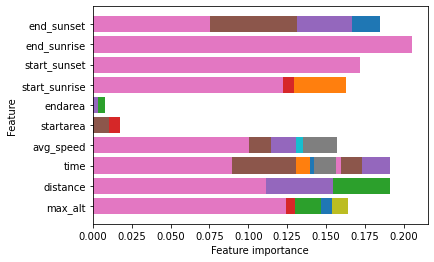

In [277]:
# decisiontree
from sklearn.tree import export_graphviz

klist = [10, 8, 7, 6, 5, 4, 3.5, 3, 2.5, 2, 1.7, 1.6, 1.5, 1.3, 1.2, 1.1, 1]
for k in klist:
    print(k)
    train2017, label2017 = data_preprocessing(df2017, k*n)
    train2016, label2016 = data_preprocessing(df2016, k*n2)
    X = np.append(train2017, train2016, axis=0)
    y = np.append(label2017, label2016, axis=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#     model = decision_tree(X_train, X_test, y_train, y_test)
    test2017, testlabel2017 = data_preprocessing(df2017, (r-k)*n)
    test2016, testlabel2016 = data_preprocessing(df2016, (r-k)*n2)
    XX = np.append(test2017, test2016, axis=0)
    yy = np.append(testlabel2017, testlabel2016, axis=0)
    _, XX, _, yy = train_test_split(XX, yy, test_size=0.2)
    XX = np.append(X_test, XX, axis=0)
    yy = np.append(y_test, yy, axis=0)
    model = decision_tree(X_train, XX, y_train, yy)
#     export_graphviz(model, outfile="tree.dot", class_names=["passenger","cargo"],
#                    feature_names=cancer.feature_names, impurity=False, filled=True)

10
Accuray: 0.9315589353612167
F1-score: 0.6428571428571429
Feature importance:
[0.11170867 0.12730504 0.1300436  0.11577148 0.01146837 0.00895218
 0.12331013 0.1167883  0.12691838 0.12773384]
5
Accuray: 0.927073837739289
F1-score: 0.6581196581196581
Feature importance:
[0.11068969 0.1237266  0.1312328  0.1174963  0.01058805 0.00911917
 0.12844924 0.11812383 0.12707908 0.12349524]
4
Accuray: 0.91796875
F1-score: 0.7021276595744681
Feature importance:
[0.11087576 0.12604565 0.12923304 0.11745752 0.01063266 0.01263639
 0.11999512 0.10994012 0.13238484 0.1307989 ]
3.5
Accuray: 0.9067882472137792
F1-score: 0.6567164179104477
Feature importance:
[0.10735558 0.13095388 0.13032178 0.11495932 0.01183346 0.01217053
 0.1235309  0.11419329 0.12928334 0.12539792]
3
Accuray: 0.8916929547844374
F1-score: 0.6308243727598566
Feature importance:
[0.11347607 0.12961494 0.13201137 0.11714806 0.01215207 0.00857723
 0.12747204 0.11780043 0.12072228 0.12102551]
2.5
Accuray: 0.8775956284153006
F1-score: 0.64

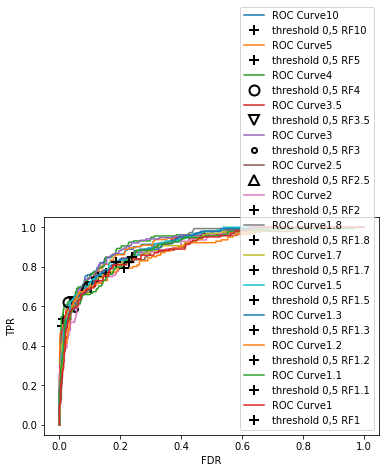

In [405]:
# randomforest
from sklearn.tree import export_graphviz

klist = [10, 5, 4, 3.5, 3, 2.5, 2, 1.8, 1.7, 1.5, 1.3, 1.2, 1.1, 1]
for k in klist:
    print(k)
    train2017, label2017 = data_preprocessing(df2017, k*n)
    train2016, label2016 = data_preprocessing(df2016, k*n2)
    X = np.append(train2017, train2016, axis=0)
    y = np.append(label2017, label2016, axis=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#     model = random_forest(X_train, X_test, y_train, y_test, k)
    test2017, testlabel2017 = data_preprocessing(df2017, (r-k)*n)
    test2016, testlabel2016 = data_preprocessing(df2016, (r-k)*n2)
    XX = np.append(test2017, test2016, axis=0)
    yy = np.append(testlabel2017, testlabel2016, axis=0)
    _, XX, _, yy = train_test_split(XX, yy, test_size=0.2)
    XX = np.append(X_test, XX, axis=0)
    yy = np.append(y_test, yy, axis=0)
    model = random_forest(X_train, XX, y_train, yy, k)
#     plt.savefig('ROC_rf', bbox_inches='tight', pad_inches=0)
#     export_graphviz(model, outfile="tree.dot", class_names=["passenger","cargo"],
#                    feature_names=cancer.feature_names, impurity=False, filled=True)

10
Accuray: 0.8904942965779468
F1-score: 0.21739130434782608
Feature importance:
[0.1104737  0.09118654 0.12719593 0.09746012 0.00898657 0.
 0.15386691 0.1169434  0.1368139  0.15707293]
8
Accuray: 0.9072243346007605
F1-score: 0.2823529411764706
Feature importance:
[0.11530004 0.13083241 0.13763322 0.13414434 0.00183702 0.00433548
 0.0939721  0.15081671 0.16468679 0.06644187]
7
Accuray: 0.9138486312399355
F1-score: 0.4022346368715084
Feature importance:
[0.13479621 0.13905717 0.11334635 0.11871046 0.00370639 0.0124626
 0.13743137 0.0698709  0.14715068 0.12346786]
6
Accuray: 0.9033361847733106
F1-score: 0.3468208092485549
Feature importance:
[0.10626307 0.14010073 0.14804057 0.10441749 0.01661454 0.0004222
 0.1201544  0.10202122 0.12189704 0.14006874]
5
Accuray: 0.902461257976299
F1-score: 0.4088397790055248
Feature importance:
[0.12609785 0.12163628 0.13134736 0.08912936 0.01265383 0.
 0.10968027 0.13929335 0.154659   0.11550269]
4
Accuray: 0.890625
F1-score: 0.5172413793103449
Feature 

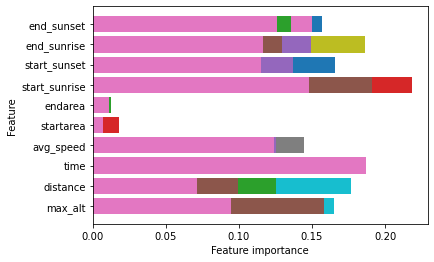

In [288]:
klist = [10, 8, 7, 6, 5, 4, 3.5, 3, 2.5, 2, 1.7, 1.6, 1.5, 1.3, 1.2, 1.1, 1]
for k in klist:
    print(k)
    train2017, label2017 = data_preprocessing(df2017, k*n)
    train2016, label2016 = data_preprocessing(df2016, k*n2)
    X = np.append(train2017, train2016, axis=0)
    y = np.append(label2017, label2016, axis=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#     model = train_model(X_train, X_test, y_train, y_test)
    test2017, testlabel2017 = data_preprocessing(df2017, (r-k)*n)
    test2016, testlabel2016 = data_preprocessing(df2016, (r-k)*n2)
    XX = np.append(test2017, test2016, axis=0)
    yy = np.append(testlabel2017, testlabel2016, axis=0)
    _, XX, _, yy = train_test_split(XX, yy, test_size=0.2)
    XX = np.append(X_test, XX, axis=0)
    yy = np.append(y_test, yy, axis=0)
    model = gradient_boosting(X_train, XX, y_train, yy)

In [290]:
klist = [10, 8, 7, 6, 5, 4, 3.5, 3, 2.5, 2, 1.7, 1.6, 1.5, 1.3, 1.2, 1.1, 1]
for k in klist:
    print(k)
    train2017, label2017 = data_preprocessing(df2017, k*n)
    train2016, label2016 = data_preprocessing(df2016, k*n2)
    X = np.append(train2017, train2016, axis=0)
    y = np.append(label2017, label2016, axis=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#     model = train_model(X_train, X_test, y_train, y_test)
    test2017, testlabel2017 = data_preprocessing(df2017, (r-k)*n)
    test2016, testlabel2016 = data_preprocessing(df2016, (r-k)*n2)
    XX = np.append(test2017, test2016, axis=0)
    yy = np.append(testlabel2017, testlabel2016, axis=0)
    _, XX, _, yy = train_test_split(XX, yy, test_size=0.2)
    XX = np.append(X_test, XX, axis=0)
    yy = np.append(y_test, yy, axis=0)
    model = mlp(X_train, XX, y_train, yy)

10
Accuray: 0.8935361216730038
F1-score: 0.2391304347826087
8
Accuray: 0.8950570342205323
F1-score: 0.30999999999999994
7
Accuray: 0.8607085346215781
F1-score: 0.1642512077294686
6
Accuray: 0.8699743370402053
F1-score: 0.24752475247524755
5
Accuray: 0.877848678213309
F1-score: 0.24719101123595502
4
Accuray: 0.8388671875
F1-score: 0.27312775330396477
3.5
Accuray: 0.8368794326241135
F1-score: 0.27802690582959644
3
Accuray: 0.8107255520504731
F1-score: 0.34782608695652173
2.5
Accuray: 0.8185792349726776
F1-score: 0.3851851851851852
2
Accuray: 0.7824601366742597
F1-score: 0.36120401337792635
1.7
Accuray: 0.7733644859813084
F1-score: 0.38993710691823896
1.6
Accuray: 0.7856301531213192
F1-score: 0.40131578947368424
1.5
Accuray: 0.7553444180522565
F1-score: 0.4432432432432432
1.3
Accuray: 0.7533252720677146
F1-score: 0.43333333333333335
1.2
Accuray: 0.723170731707317
F1-score: 0.46588235294117647
1.1
Accuray: 0.6145320197044335
F1-score: 0.3969171483622351
1
Accuray: 0.7043478260869566
F1-sco

4
Accuray: 0.91015625
F1-score: 0.648854961832061
Feature importance:
[0.10899216 0.12061845 0.13088778 0.11756837 0.01043323 0.01110408
 0.12527255 0.12206925 0.12863261 0.12442152]
3.5
Accuray: 0.92806484295846
F1-score: 0.7279693486590038
Feature importance:
[0.10774342 0.12859797 0.13707014 0.113766   0.00921097 0.00958492
 0.1256476  0.11737313 0.12812287 0.122883  ]
3
Accuray: 0.8937960042060988
F1-score: 0.6731391585760517
Feature importance:
[0.10475044 0.13595067 0.12799308 0.12488407 0.01057903 0.01084908
 0.12306273 0.11100369 0.12859805 0.12232916]
2.5
Accuray: 0.898360655737705
F1-score: 0.6568265682656826
Feature importance:
[0.11144234 0.11262151 0.13856084 0.11354334 0.00928385 0.01129553
 0.12821272 0.12004222 0.1284591  0.12653855]
2
Accuray: 0.8883826879271071
F1-score: 0.6776315789473684
Feature importance:
[0.11826543 0.12466268 0.12733791 0.11227495 0.01082743 0.00950936
 0.12179849 0.12279476 0.13133706 0.12119194]


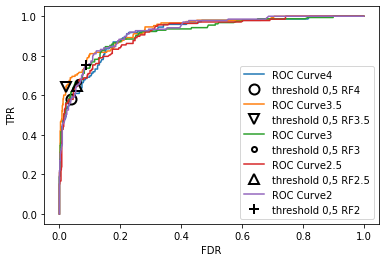

In [403]:
klist = [4, 3.5, 3, 2.5, 2]
for k in klist:
    print(k)
    train2017, label2017 = data_preprocessing(df2017, k*n)
    train2016, label2016 = data_preprocessing(df2016, k*n2)
    X = np.append(train2017, train2016, axis=0)
    y = np.append(label2017, label2016, axis=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#     model = random_forest(X_train, X_test, y_train, y_test, k)
    test2017, testlabel2017 = data_preprocessing(df2017, (r-k)*n)
    test2016, testlabel2016 = data_preprocessing(df2016, (r-k)*n2)
    XX = np.append(test2017, test2016, axis=0)
    yy = np.append(testlabel2017, testlabel2016, axis=0)
    _, XX, _, yy = train_test_split(XX, yy, test_size=0.2)
    XX = np.append(X_test, XX, axis=0)
    yy = np.append(y_test, yy, axis=0)
    model = random_forest(X_train, XX, y_train, yy, k)
    plt.savefig('ROC_2', bbox_inches='tight')

# Predict

In [321]:
dfvalid = df2017[df2017.isnull().values == True]
dfvalid = dfvalid.drop(['Icao24', 'cls', 'Callsign_t', 'start', 'end', 'start_lon', 'end_lon', 'start_lat', 'end_lat', 'type'],axis=1)
dfvalid = dfvalid.dropna()

valid = np.array(dfvalid)
predict = model.predict(valid)
result = pd.DataFrame(predict,columns=['type'])
result.groupby('type')['type'].count()

type
0.0    3939
1.0     288
Name: type, dtype: int64

In [76]:
dfvalid = dfvalid.reset_index()
dfpredict = pd.concat([dfvalid, result], axis=1).drop(['startarea','endarea', 'max_alt', 'distance', 'time', 'avg_speed', 'start_sunrise', 'start_sunset', 'end_sunrise', 'end_sunset'], axis=1)
print(dfpredict)

      index  type
0         6   0.0
1        21   0.0
2        22   0.0
3        23   0.0
4        24   0.0
...     ...   ...
4222   8844   0.0
4223   8845   0.0
4224   8859   0.0
4225   8861   0.0
4226   8865   0.0

[4227 rows x 2 columns]


In [347]:
import math
dfclassified = pd.merge(df2017, dfpredict, left_index=True, right_on='index', how='outer')
dfclassified['type'] = dfclassified.apply(lambda row: row['type_y'] if math.isnan(row['type_x']) else row['type_x'], axis=1)

In [78]:
dfclassified = dfclassified.drop(['type_x', 'type_y'], axis=1).reset_index()
dfclassified.to_csv(r'features_2017.csv',encoding='GBK',mode='a')